# Chapter 6. AI 기초 - Preprocessing

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')

# 1. Encoding

In [2]:
df = pd.DataFrame([['green','M',10.1,'shirts'],
                   ['red','L',13.5,'hat'],
                   ['blue','XL',15.3,'shirts']],
                  columns = ['color','size','price','category'])
df

,color,size,price,category
0,green,M,10.1,shirts
1,red,L,13.5,hat
2,blue,XL,15.3,shirts


In [3]:
df_ = df.copy()
df_['category'] = df_['category'].map({'shirts':0, 'hat':1})
df_

,color,size,price,category
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


## LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
df_ = df.copy()
le = LabelEncoder()
df_['category'] = le.fit_transform(df_['category'])
df_

,color,size,price,category
0,green,M,10.1,1
1,red,L,13.5,0
2,blue,XL,15.3,1


In [6]:
df_ = df.copy()
le = LabelEncoder()
df_['size'] = le.fit_transform(df_['size'])
df_

,color,size,price,category
0,green,1,10.1,shirts
1,red,0,13.5,hat
2,blue,2,15.3,shirts


* 대소가 있는 경우 Encoding 후 Scaling을 적용해주는 것이 좋을 수 있다.(필수 요소는 아님)
* LabelEncoer는 랜덤으로 생성해주기 때문에 대소관계가 있는 변수는 map 함수를 활용하는 것이 좋다.

### 원래대로 복구

In [7]:
le.inverse_transform([0,1,0,0])

array(['L', 'M', 'L', 'L'], dtype=object)

## OneHotEncoder

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
df_ = df.copy()
ohe = OneHotEncoder(sparse_output = False)
ohe.fit_transform(df_['color'].values.reshape(-1,1))

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

* OneHotEncoding은 Scaling을 하면 안 된다.

### get_dummies

In [10]:
pd.get_dummies(df_, drop_first= True)

,price,color_green,color_red,size_M,size_XL,category_shirts
0,10.1,1,0,1,0,1
1,13.5,0,1,0,0,0
2,15.3,0,0,0,1,1


## Ex) 변수별 Encoding

In [11]:
df = pd.DataFrame([['green','M',10.1,'shirts'],
                   ['red','L',13.5,'hat'],
                   ['blue','XL',15.3,'shirts']],
                  columns = ['color','size','price','category'])
df

,color,size,price,category
0,green,M,10.1,shirts
1,red,L,13.5,hat
2,blue,XL,15.3,shirts


In [12]:
df_ = df.copy()
df_['size'] = df_['size'].map({'M':0, 'L':1, 'XL':2})
df_

,color,size,price,category
0,green,0,10.1,shirts
1,red,1,13.5,hat
2,blue,2,15.3,shirts


In [13]:
le = LabelEncoder()
df_['category'] = le.fit_transform(df_['category'])
df_

,color,size,price,category
0,green,0,10.1,1
1,red,1,13.5,0
2,blue,2,15.3,1


In [14]:
X = pd.get_dummies(df_.iloc[:,:-1], drop_first= True)
X

,size,price,color_green,color_red
0,0,10.1,1,0
1,1,13.5,0,1
2,2,15.3,0,0


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
ss = StandardScaler()
X['price'] = ss.fit_transform(X.loc[:,['price']])
# X['price'] = ss.fit_transform(X['price'].values.reshape(-1,1)) # 열이 1개인 경우만 가능

In [17]:
mm = MinMaxScaler()
X['size'] = mm.fit_transform(X.loc[:,['size']])
X

,size,price,color_green,color_red
0,0.0,-1.329544,1,0
1,0.5,0.247357,0,1
2,1.0,1.082187,0,0


# 2. Imbalanced data

## Under Sampling

In [18]:
from sklearn.datasets import make_classification

In [19]:
X, Y = make_classification(n_samples= 10000,
                           n_features= 5,
                           weights= [0.99],
                           flip_y= 0,
                           random_state= 1)

In [20]:
np.unique(Y, return_counts= True)

(array([0, 1]), array([9900,  100], dtype=int64))

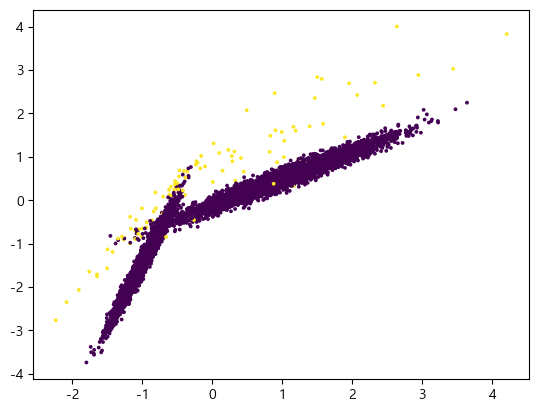

In [21]:
plt.figure()

plt.scatter(X[:,0],X[:,1],
            c= Y,
            s= 3)

plt.show()

### RandomUnderSampler

In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
rus = RandomUnderSampler(sampling_strategy= 'majority')
X_us, Y_us = rus.fit_resample(X, Y)

(array([0, 1]), array([100, 100], dtype=int64)) 



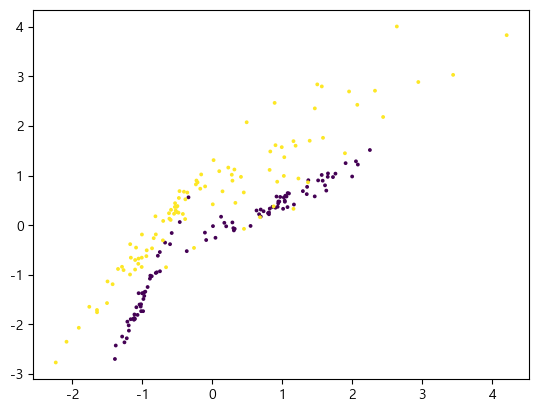

In [24]:
print(np.unique(Y_us, return_counts= True),'\n')

plt.figure()

plt.scatter(X_us[:,0],X_us[:,1],
            c= Y_us,
            s= 3)

plt.show()

(array([0, 1]), array([500, 100], dtype=int64)) 



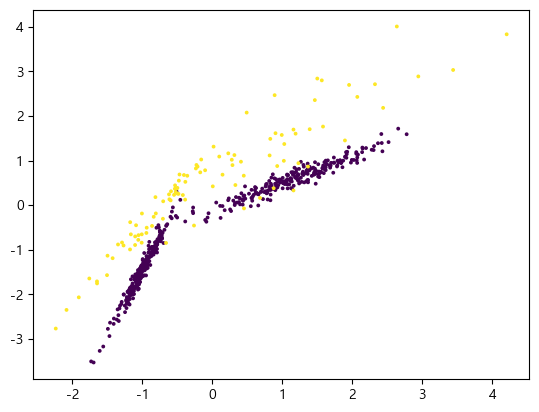

In [25]:
rus = RandomUnderSampler(sampling_strategy= 0.2) # 0.2 = 1/5 -> 5배
X_us, Y_us = rus.fit_resample(X, Y)

print(np.unique(Y_us, return_counts= True),'\n')

plt.figure()

plt.scatter(X_us[:,0],X_us[:,1],
            c= Y_us,
            s= 3)

plt.show()

## Over Sampling

In [26]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

### RandomOverSampler
* 같은 데이터를 여러개로 늘리는 방법

(array([0, 1]), array([9900, 9900], dtype=int64)) 



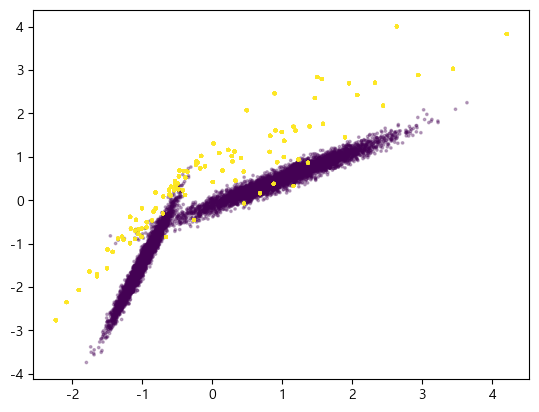

In [27]:
ros = RandomOverSampler(sampling_strategy= 'minority')
X_os, Y_os = ros.fit_resample(X, Y)

print(np.unique(Y_os, return_counts= True),'\n')

plt.figure()

plt.scatter(X_os[:,0],X_os[:,1],
            c= Y_os,
            s= 3,
            alpha= 0.3)

plt.show()

(array([0, 1]), array([9900, 4950], dtype=int64)) 



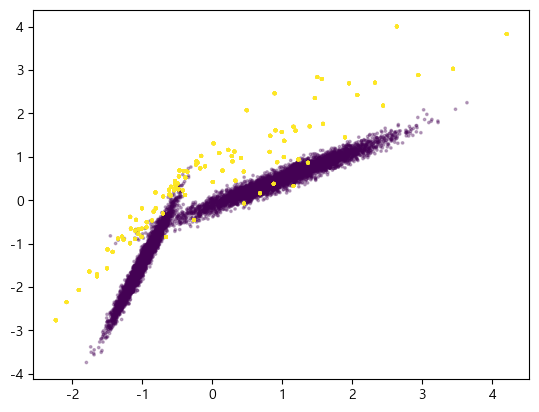

In [28]:
ros = RandomOverSampler(sampling_strategy= 0.5)
X_os, Y_os = ros.fit_resample(X, Y)

print(np.unique(Y_os, return_counts= True),'\n')

plt.figure()

plt.scatter(X_os[:,0],X_os[:,1],
            c= Y_os,
            s= 3,
            alpha= 0.3)

plt.show()

* 하나의 데이터가 틀리면 해당 데이터로부터 늘어난 모든 데이터가 틀리는 문제 발생

### SMOTE
* 데이터를 보간법으로 늘려 RandomOverSampler의 단점을 극복

(array([0, 1]), array([9900, 9900], dtype=int64)) 



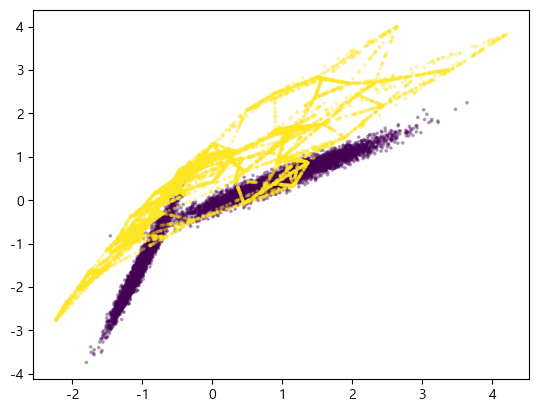

In [29]:
sm = SMOTE(sampling_strategy= 'minority')
X_os, Y_os = sm.fit_resample(X, Y)

print(np.unique(Y_os, return_counts= True),'\n')

plt.figure()

plt.scatter(X_os[:,0],X_os[:,1],
            c= Y_os,
            s= 3,
            alpha= 0.3)

plt.show()

(array([0, 1]), array([9900, 1980], dtype=int64)) 



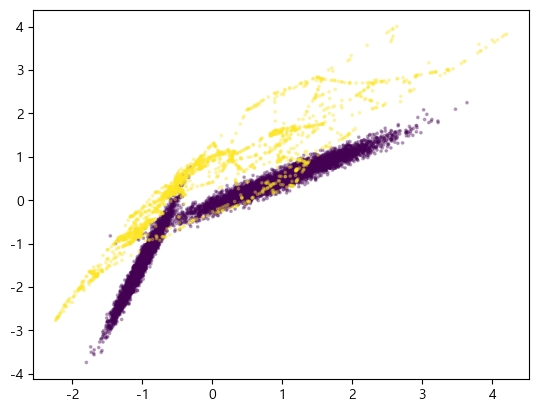

In [30]:
sm = SMOTE(sampling_strategy= 0.2)
X_os, Y_os = sm.fit_resample(X, Y)

print(np.unique(Y_os, return_counts= True),'\n')

plt.figure()

plt.scatter(X_os[:,0],X_os[:,1],
            c= Y_os,
            s= 3,
            alpha= 0.3)

plt.show()